In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import glob
import os
import time

from pynx import scattering
from pynx.scattering import fthomson

from misc import rotate_coords, file_nb, rsm_4fold, arb_scan
from MD2RSM import RSM

Processing file 0, please wait...
Lattice parameter: 6.225809987333333
Ba F
Computing scattering for the cationic sub-lattice...
Computing time: 1.4456534385681152
Computing scattering for the anionic sub-lattice...
Computing time: 1.7227885723114014
Computing full scattering...
Computing time: 7.6107
Saving RSM data...
Ba F
Computing scattering for the cationic sub-lattice...
Computing time: 1.447667121887207
Computing scattering for the anionic sub-lattice...
Computing time: 1.6901381015777588
Computing full scattering...
Computing time: 7.5681
Saving RSM data...
Saving Figures...
Done


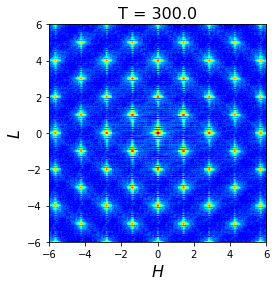

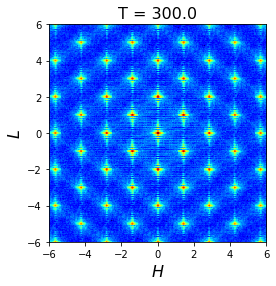

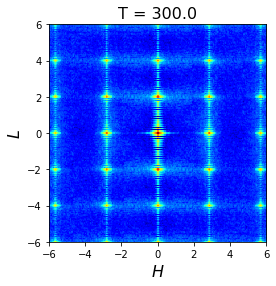

Processing file 1, please wait...
Lattice parameter: 6.230803426
Ba F
Computing scattering for the cationic sub-lattice...
Computing time: 1.4113776683807373
Computing scattering for the anionic sub-lattice...
Computing time: 1.689054012298584
Computing full scattering...
Computing time: 7.7943
Saving RSM data...
Ba F
Computing scattering for the cationic sub-lattice...
Computing time: 1.3827025890350342
Computing scattering for the anionic sub-lattice...
Computing time: 1.7004964351654053
Computing full scattering...
Computing time: 7.8151
Saving RSM data...
Saving Figures...
Done


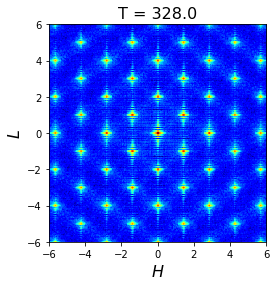

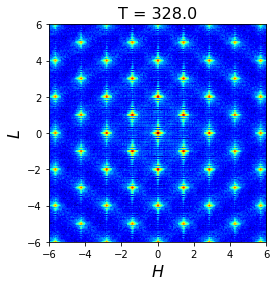

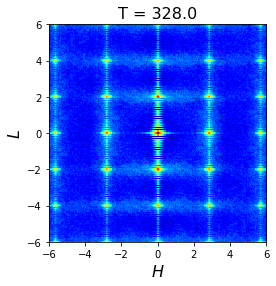

Processing file 2, please wait...
Lattice parameter: 6.235896682666667
Ba F
Computing scattering for the cationic sub-lattice...
Computing time: 1.4550769329071045
Computing scattering for the anionic sub-lattice...
Computing time: 1.6870660781860352
Computing full scattering...
Computing time: 7.7910
Saving RSM data...
Ba F
Computing scattering for the cationic sub-lattice...
Computing time: 1.4357287883758545
Computing scattering for the anionic sub-lattice...
Computing time: 1.7364585399627686
Computing full scattering...
Computing time: 7.8023
Saving RSM data...
Saving Figures...
Done


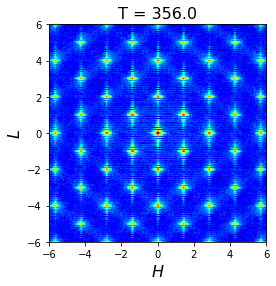

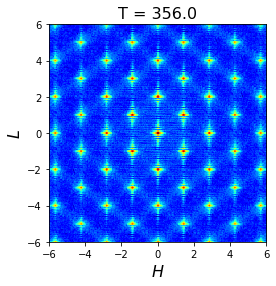

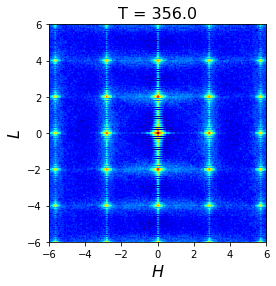

Processing file 3, please wait...
Lattice parameter: 6.241063181333333
Ba F
Computing scattering for the cationic sub-lattice...


In [ ]:
cation, anion = "Ba2+", "F1-"
# Cell rotation
rotx, roty, rotz = 0, 0, 45
# Miller indices
step = 0.02
h = np.arange(-6,6+step,step)
k = np.arange(-0.25,0.25,0.005)[:,np.newaxis]
l = np.arange(-6,6+step,step)[:,np.newaxis,np.newaxis]

# Define input and output path
file_path = "/media/aboulle/Local data/UO2_superionique/structures/bf/Sayle/"
file_name_template = "str"
output_file_path = file_path + "RSM/"
file_name = None

# Get file name from folder or from above
if file_name:
    file_name_list = [file_path + file_name]
else:
    file_name_list = sorted(glob.glob(file_path+file_name_template+".*"),key=file_nb)

# Create output path
try:
    os.mkdir(output_file_path)
except:
    pass

for file_name in file_name_list:
    # Get the lattice parameter from the header file. REQUIRES THE NB of UC / DIRECTION
    nbuc = 10
    with open(file_name, 'r') as f:
        for line in f:
            if line.startswith('Lattice'):
                header = np.array(str(line).split('"')[1].split(), dtype=np.float64)
                acryst = (header[::4].mean()) / nbuc
                break
    nb = file_nb(file_name)
    print("Processing file %i, please wait..." % (nb))
    print("Lattice parameter:",acryst)
 
    # Load temperature file
    t_data = np.loadtxt(file_path + "T.dat")
    label = "T = "+str(round(t_data[nb]))
    
    # Compute the RSM for 2 azimuths
    rsm, rsmU, rsmO = RSM(file_name, cation, anion, h, k, l, acryst, [rotx, roty, rotz], output_file_path, sublattices=True)
    rsm90, rsmU90, rsmO90 = RSM(file_name, cation, anion, h, k, l, acryst, [rotx, roty, rotz+90], output_file_path, sublattices=True)
    rsm += rsm90
    rsmU += rsmU90
    rsmO += rsmO90

    print("Saving Figures...")
    plt.ion()
    plt.figure(1)
    plt.title(label, fontsize=16)
    plt.imshow(np.log10(rsm), extent=(h.min(), h.max(), l.min(), l.max()),cmap="jet", origin="lower")
    plt.xlabel(r"$H$", fontsize=16)
    plt.ylabel(r"$L$", fontsize=16)
    plt.savefig(output_file_path + "Fig_UO2-"+str(rotx)+"-"+ str(roty)+"-"+str(rotz)+"-"+str(nb)+".png", bbox_inches="tight", dpi=150)
    #plt.close()

    plt.figure(2)
    plt.title(label, fontsize=16)
    plt.imshow(np.log10(rsmU), extent=(h.min(), h.max(), l.min(), l.max()),cmap="jet", origin="lower")
    plt.xlabel(r"$H$", fontsize=16)
    plt.ylabel(r"$L$", fontsize=16)
    plt.savefig(output_file_path + "Fig_U-"+str(rotx)+"-"+ str(roty)+"-"+str(rotz)+"-"+str(nb)+".png", bbox_inches="tight", dpi=150)
    #plt.close()

    plt.figure(3)
    plt.title(label, fontsize=16)
    plt.imshow(np.log10(rsmO), extent=(h.min(), h.max(), l.min(), l.max()),cmap="jet", origin="lower")
    plt.xlabel(r"$H$", fontsize=16)
    plt.ylabel(r"$L$", fontsize=16)
    plt.savefig(output_file_path + "Fig_O-"+str(rotx)+"-"+ str(roty)+"-"+str(rotz)+"-"+str(nb)+".png", bbox_inches="tight", dpi=150)
    #plt.close()
    print("Done")
    plt.show()

In [ ]:
%matplotlib notebook
data = rsm_4fold(rsmO)

x0, y0 = 10, 10
length = 200
ratio = np.sqrt(2)
x1, y1 = length,length*ratio
length = int(np.hypot(x1-x0, y1-y0))

angle = np.arccos((y1 - y0)/length)
print(angle*180/np.pi)
width = 5
x0min = x0 - int(np.round(width * np.cos(angle)))
x1min = x1 - int(np.round(width * np.cos(angle)))
y0min = y0 + int(np.round(width * np.sin(angle)))
y1min = y1 + int(np.round(width * np.sin(angle)))

x0max = x0 + int(np.round(width * np.cos(angle)))
x1max = x1 + int(np.round(width * np.cos(angle)))
y0max = y0 - int(np.round(width * np.sin(angle)))
y1max = y1 - int(np.round(width * np.sin(angle)))



#scan111, xx, yy = arb_scan(data, x0, y0, x1, y1, 2)
scan111 = arb_scan(data, x0, y0, x1, y1, 1)
scan111min = arb_scan(data, xmin, ymin, xmax, ymax, step, 1)

scan00L = data[:,0]
scan11L = data[:,int(1*ratio/step)]
scan22L = data[:,int(2*ratio/step)]
scan33L = data[:,int(3*ratio/step)]
scan44L = data[:,int(4*ratio/step)]
#scan55L = data[:,int(5*ratio/step)]
scanHH0 = data[0,:]
scanHH1 = data[int(1/step),:]
scanHH2 = data[int(2/step),:]
scanHH3 = data[int(3/step),:]
scanHH4 = data[int(4/step),:]
scanHH5 = data[int(5/step),:]
HHH = np.arange(length)*step
H = np.arange(data.shape[1])*step
L = np.arange(data.shape[0])*step
print(L.shape, scan111.shape)


fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2)
ax1.imshow(np.log10(data), extent=(0, H.max(), 0, L.max()), origin="lower", cmap="jet")
ax1.plot([y0*step,y1*step], [x0*step, x1*step], 'r-')
ax1.plot([y0min*step,y1min*step], [x0min*step, x1min*step], 'r-')
ax1.plot([y0max*step,y1max*step], [x0max*step, x1max*step], 'r-')
ax2.semilogx(scan00L, L, scan11L, L, scan22L, L, scan33L, L, scan44L, L)
ax3.semilogy(H, scanHH0, H, scanHH1, H, scanHH2, H, scanHH3, H, scanHH4, H, scanHH5)
ax4.semilogy(HHH, scan111)
plt.show()